In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
input_data = pd.read_csv('input_data.csv')
y = input_data.Sales
x = input_data.Time
x

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
Name: Time, dtype: int64

In [9]:
unitVector = np.ones((1,x.size))

X = np.insert(unitVector, 1, x.values, axis=0)
X

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [3]:
print (input_data.to_string(index=False))

 Time  Sales
    0      0
    1      1
    2      2
    3      3
    4      4
    5      5
    6      6
    7      7
    8      8
    9      9
   10     10
   11     11
   12     12


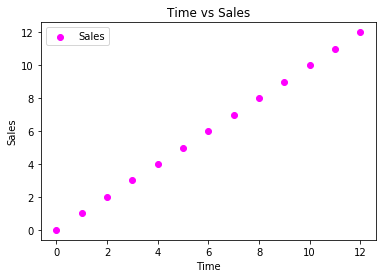

In [4]:
plt.scatter(x, y, color='magenta')
plt.title('Time vs Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.show()

In [5]:
#hyperparamters
learning_rate_alpha = 0.001
theta = np.array([[0,0]])#
num_iterations = 100

In [17]:
def linearRegressionCostFunction(hypothesis, Y):
    m = Y.size
    delta = np.subtract(hypothesis,Y)
    cost = (1/(2*m)) * np.sum(delta * delta)
    return cost

In [18]:
def linearRegressionGradientDescent(X, Y, theta):
    hypothesis = theta.dot(X)
    cost_list = []
    theta1_list = []
    m = Y.size
    
    for i in range(0,num_iterations):
        #start plotting graph
        print("Iteration: " + str(i))
        plt.scatter(x, y, color='magenta')
        plt.plot(x, hypothesis[0], color='blue')
        plt.title('Time vs Sales')
        plt.xlabel('Time')
        plt.ylabel('Sales')
        plt.legend(['Predicted Sales', 'Actual Sales'])
        plt.show()
        #end plotting graph
        
        cost_list.append(linearRegressionCostFunction(hypothesis, Y))
        theta = np.subtract(theta, (learning_rate_alpha/m) * (np.subtract(hypothesis,Y)).dot(X.transpose()))
        theta1_list.append(theta[0][1])
        hypothesis = theta.dot(X)

        
    return theta, cost_list, theta1_list

Iteration: 0


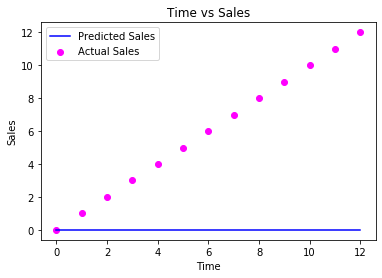

Iteration: 1


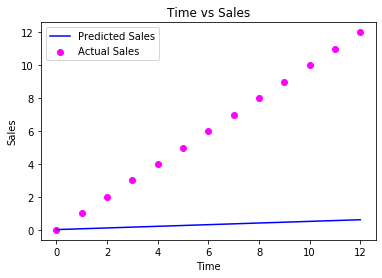

Iteration: 2


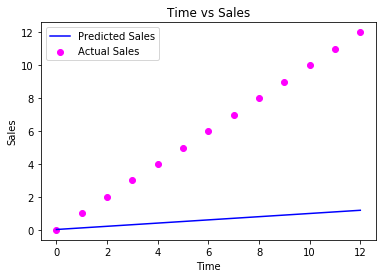

Iteration: 3


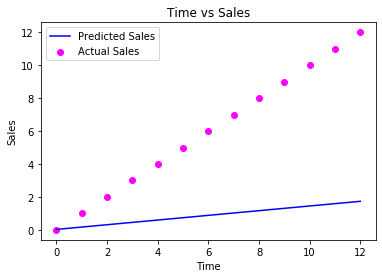

Iteration: 4


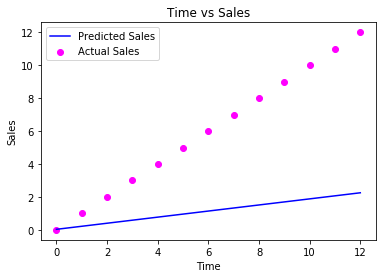

Iteration: 5


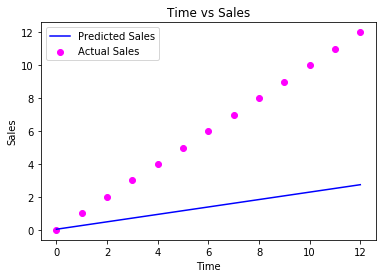

Iteration: 6


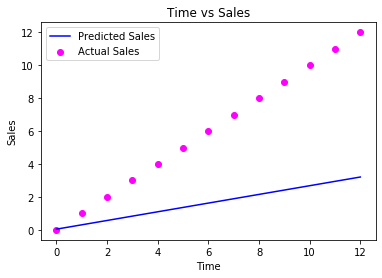

Iteration: 7


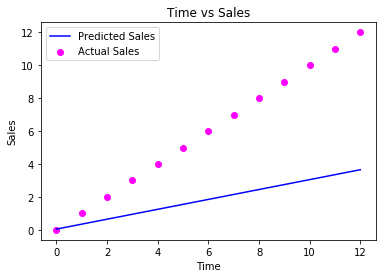

Iteration: 8


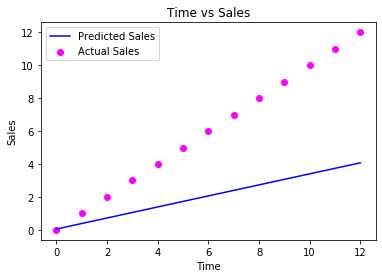

Iteration: 9


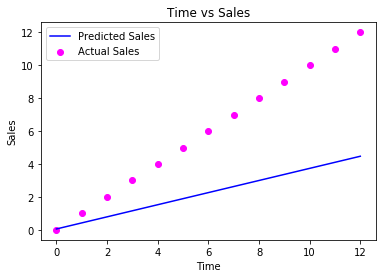

Iteration: 10


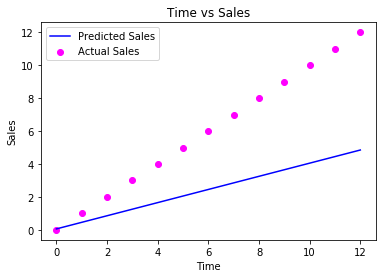

Iteration: 11


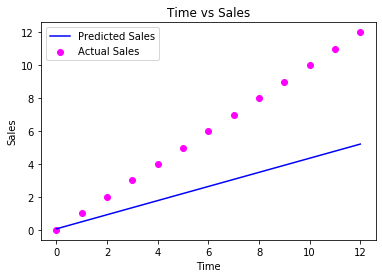

Iteration: 12


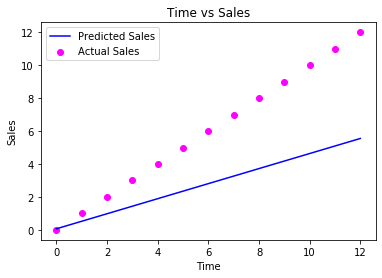

Iteration: 13


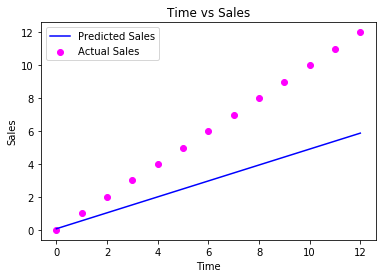

Iteration: 14


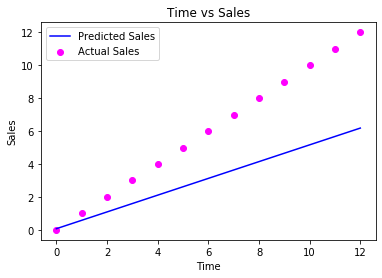

Iteration: 15


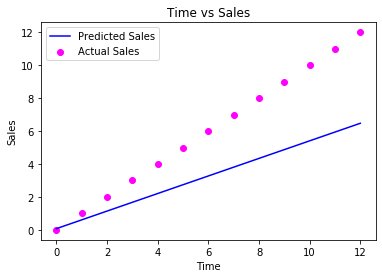

Iteration: 16


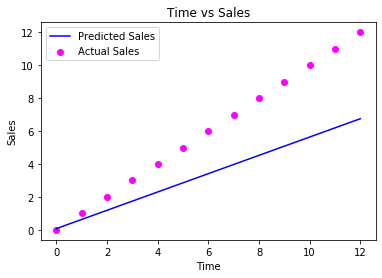

Iteration: 17


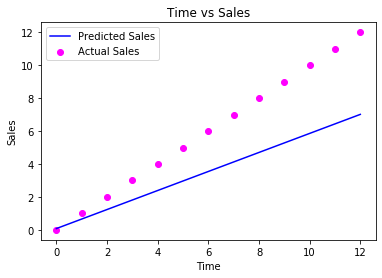

Iteration: 18


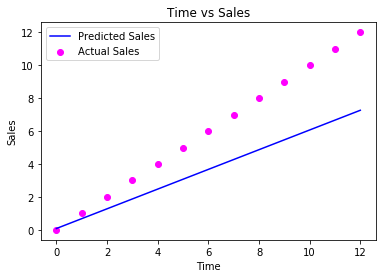

Iteration: 19


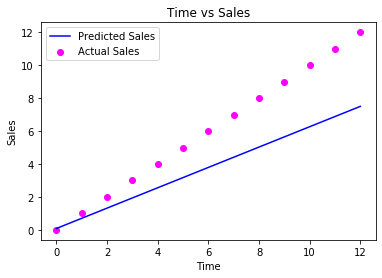

Iteration: 20


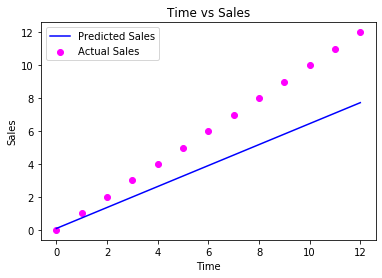

Iteration: 21


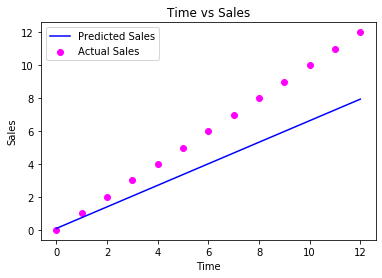

Iteration: 22


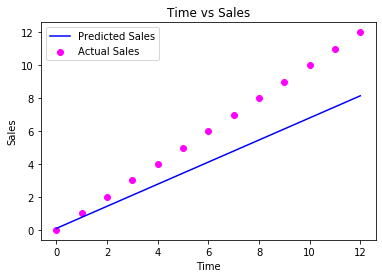

Iteration: 23


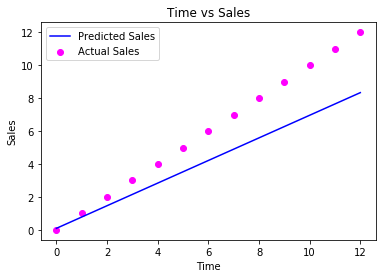

Iteration: 24


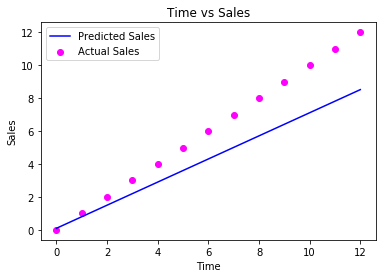

Iteration: 25


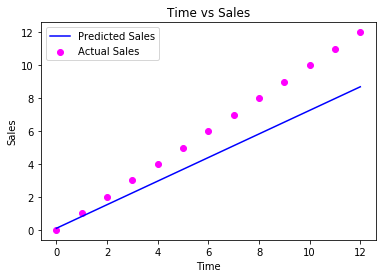

Iteration: 26


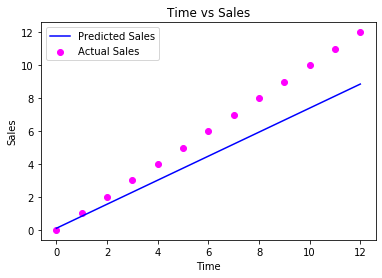

Iteration: 27


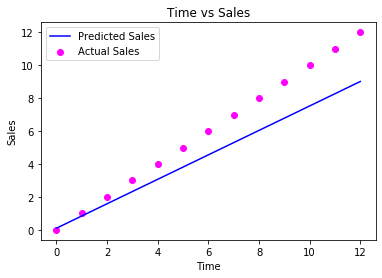

Iteration: 28


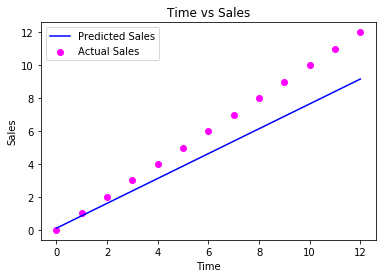

Iteration: 29


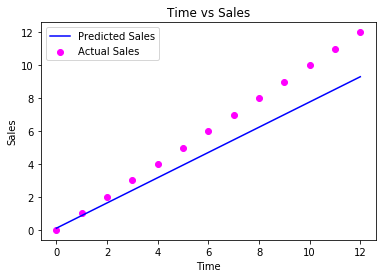

Iteration: 30


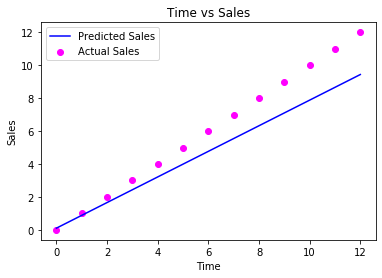

Iteration: 31


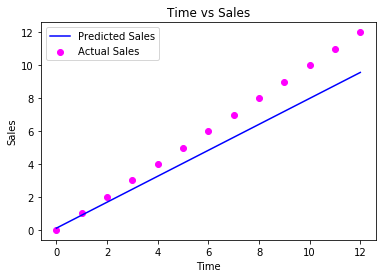

Iteration: 32


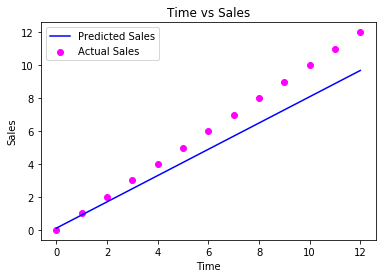

Iteration: 33


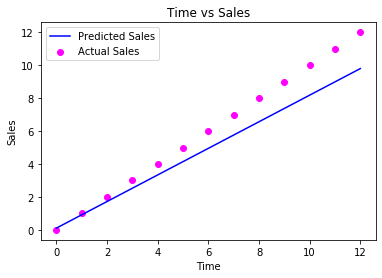

Iteration: 34


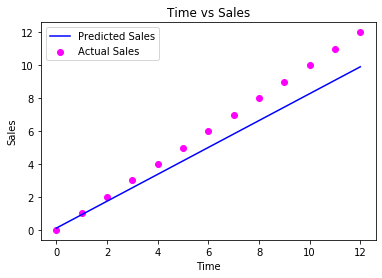

Iteration: 35


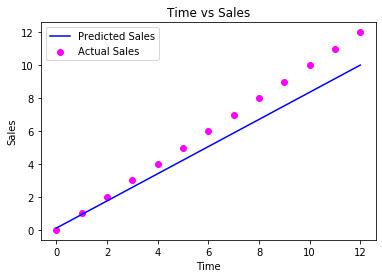

Iteration: 36


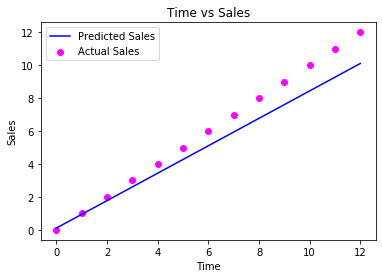

Iteration: 37


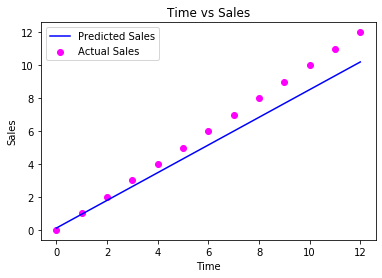

Iteration: 38


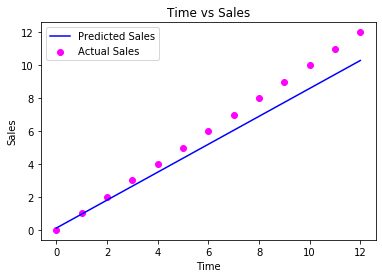

Iteration: 39


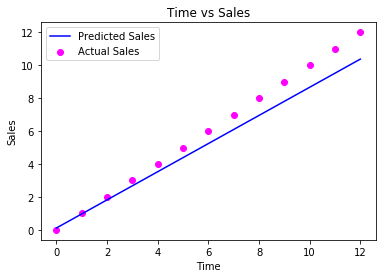

Iteration: 40


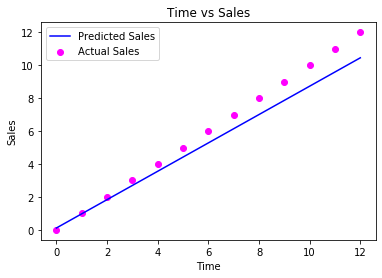

Iteration: 41


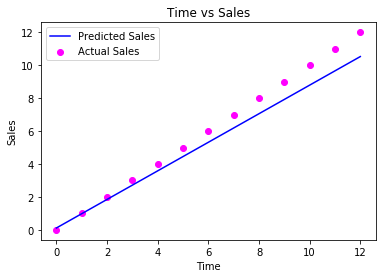

Iteration: 42


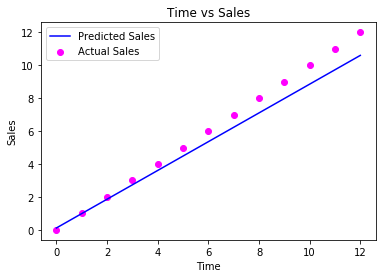

Iteration: 43


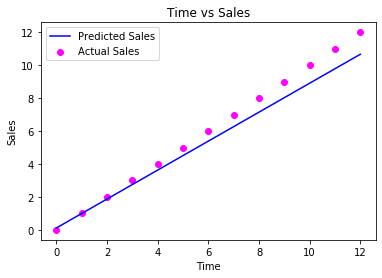

Iteration: 44


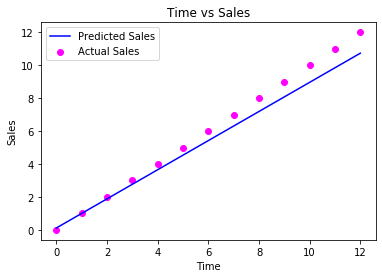

Iteration: 45


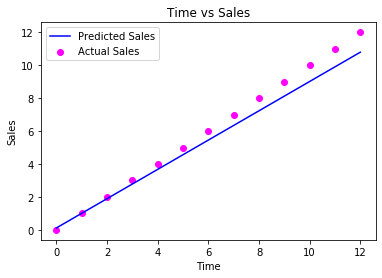

Iteration: 46


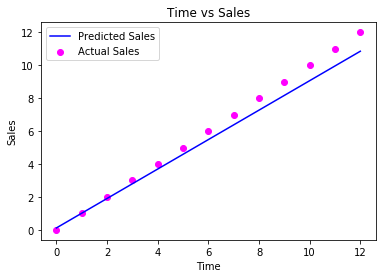

Iteration: 47


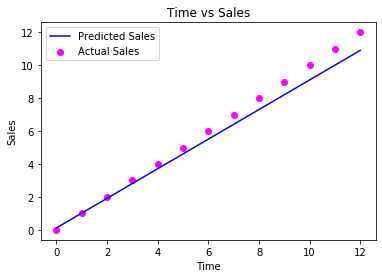

Iteration: 48


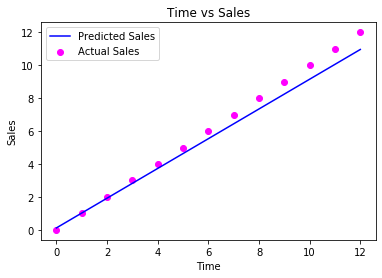

Iteration: 49


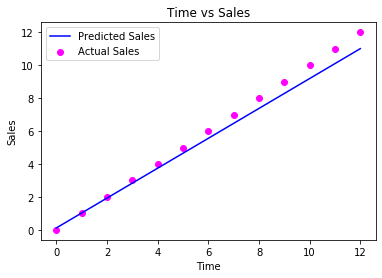

Iteration: 50


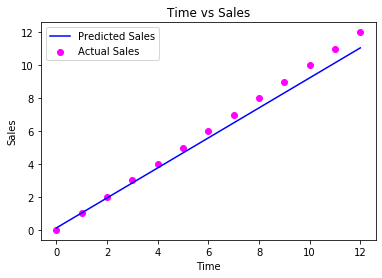

Iteration: 51


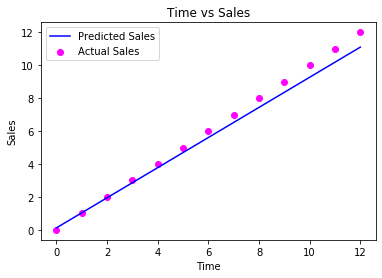

Iteration: 52


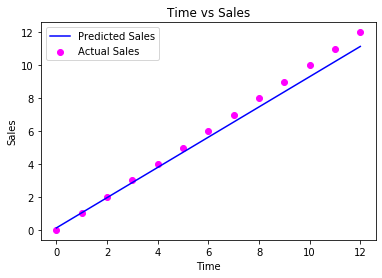

Iteration: 53


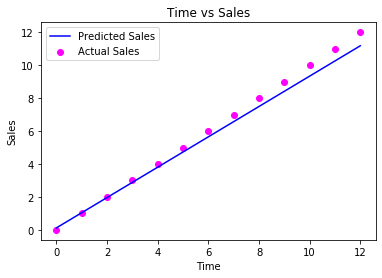

Iteration: 54


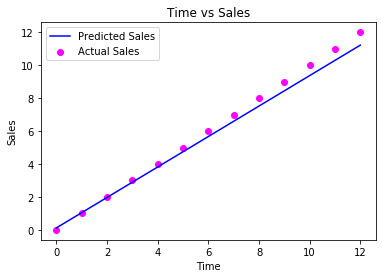

Iteration: 55


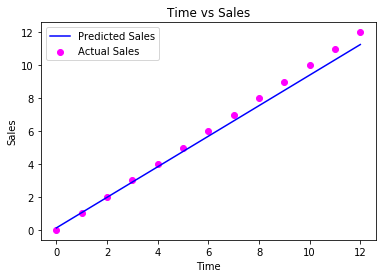

Iteration: 56


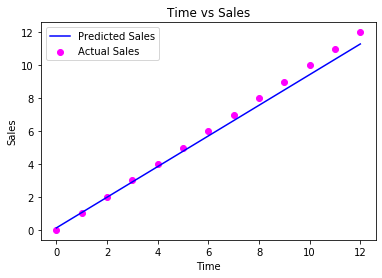

Iteration: 57


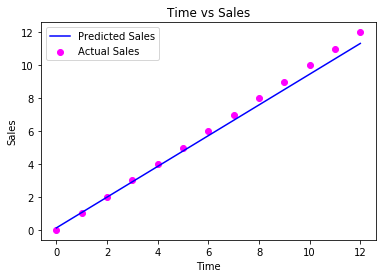

Iteration: 58


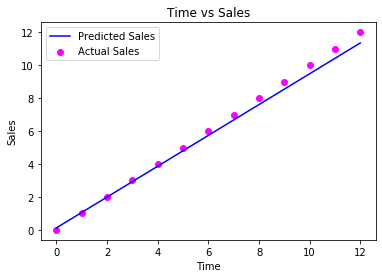

Iteration: 59


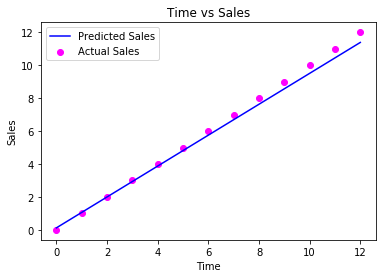

Iteration: 60


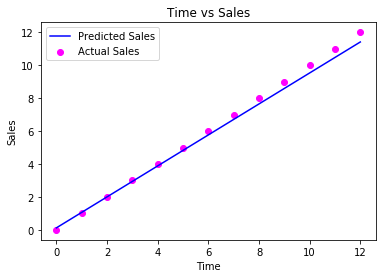

Iteration: 61


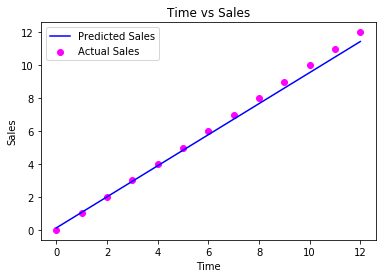

Iteration: 62


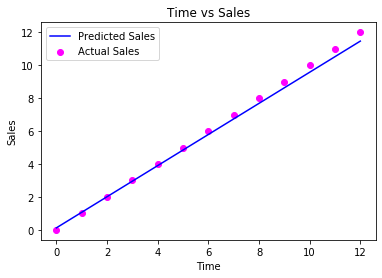

Iteration: 63


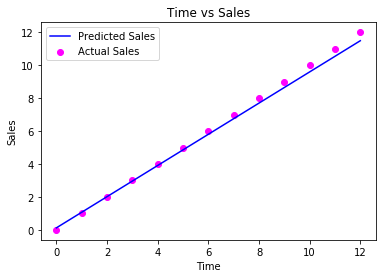

Iteration: 64


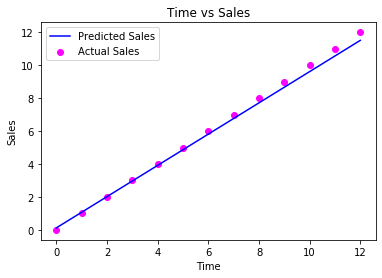

Iteration: 65


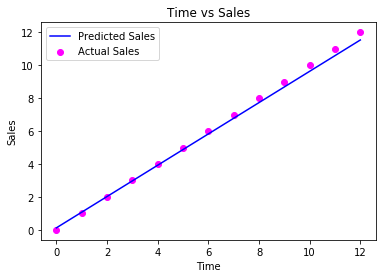

Iteration: 66


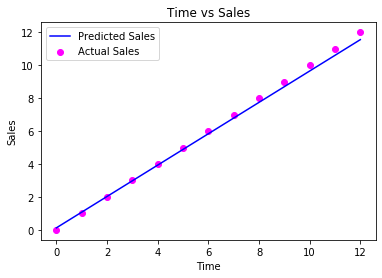

Iteration: 67


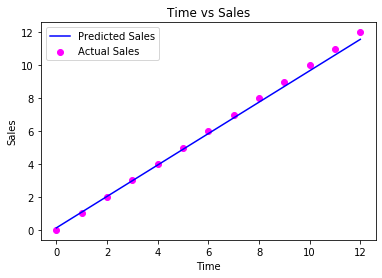

Iteration: 68


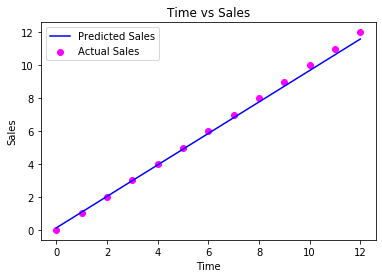

Iteration: 69


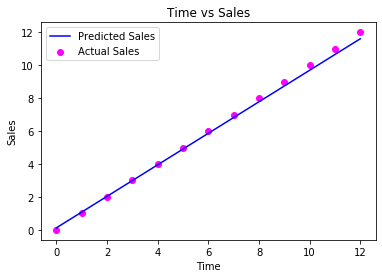

Iteration: 70


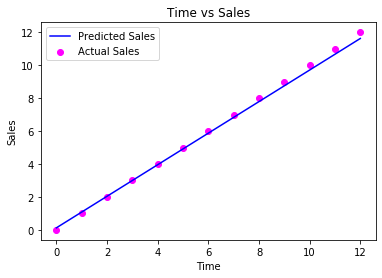

Iteration: 71


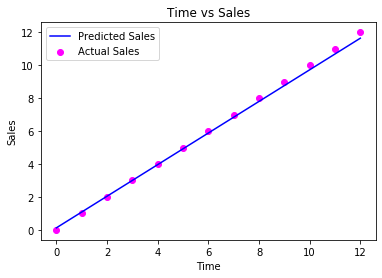

Iteration: 72


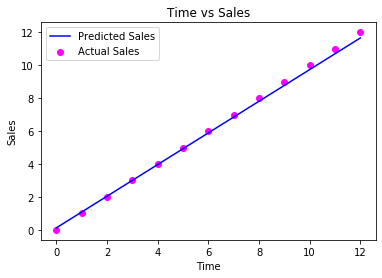

Iteration: 73


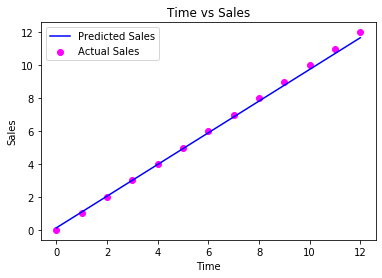

Iteration: 74


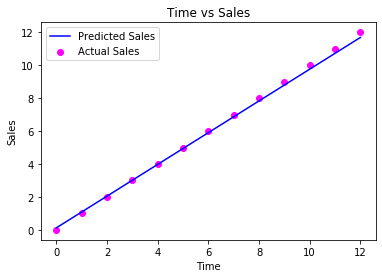

Iteration: 75


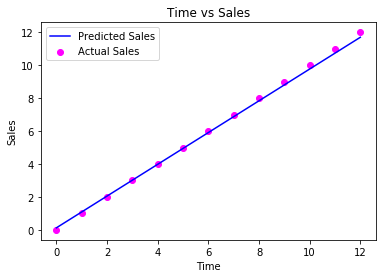

Iteration: 76


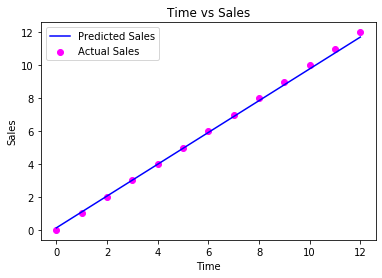

Iteration: 77


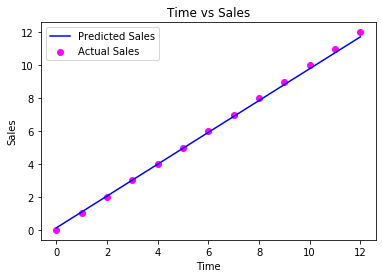

Iteration: 78


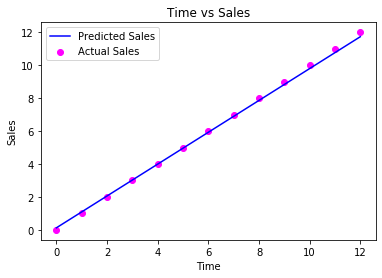

Iteration: 79


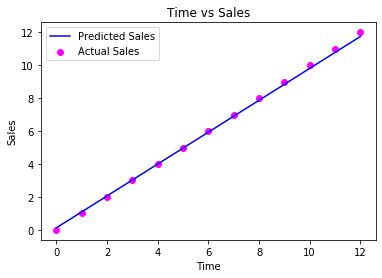

Iteration: 80


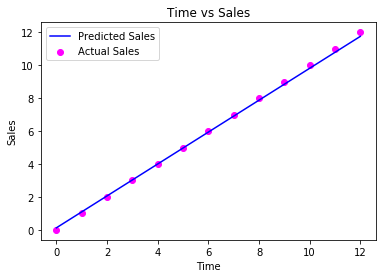

Iteration: 81


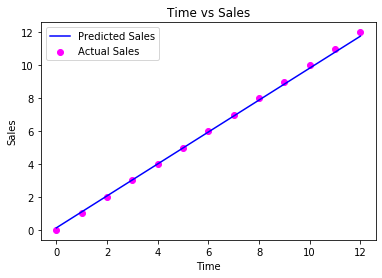

Iteration: 82


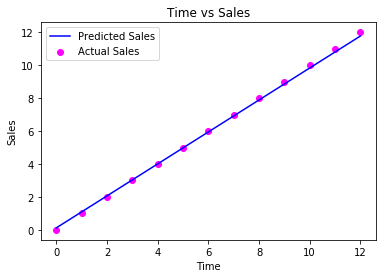

Iteration: 83


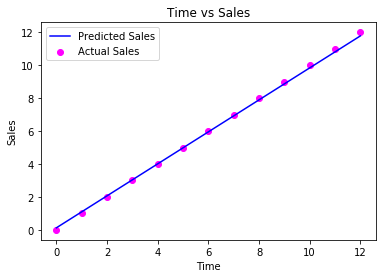

Iteration: 84


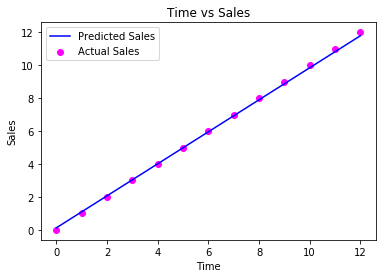

Iteration: 85


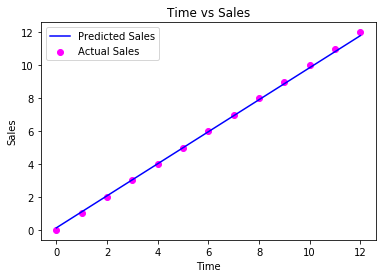

Iteration: 86


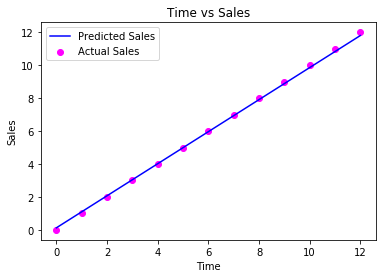

Iteration: 87


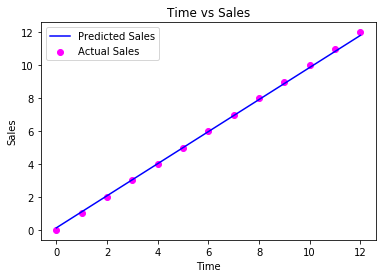

Iteration: 88


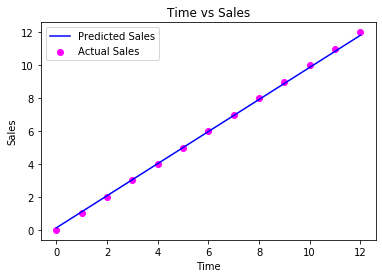

Iteration: 89


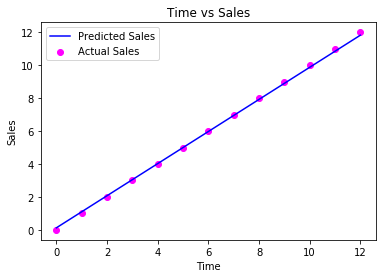

Iteration: 90


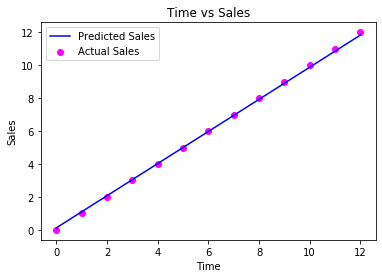

Iteration: 91


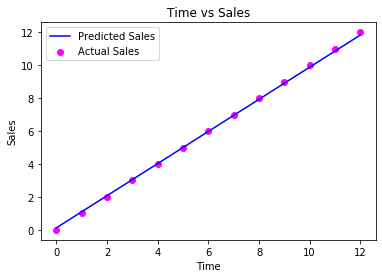

Iteration: 92


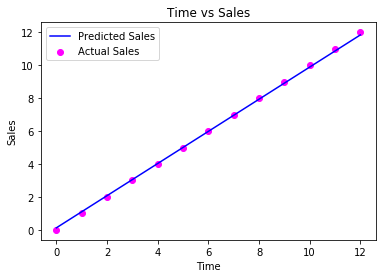

Iteration: 93


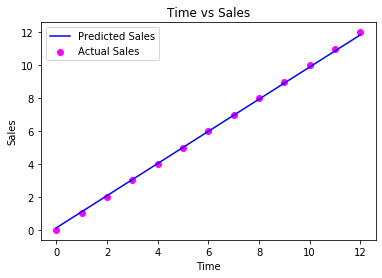

Iteration: 94


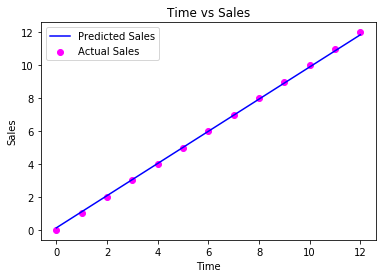

Iteration: 95


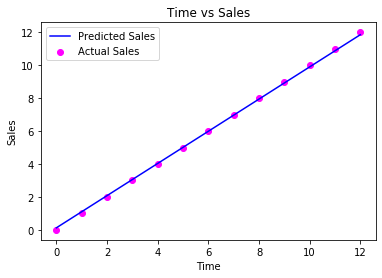

Iteration: 96


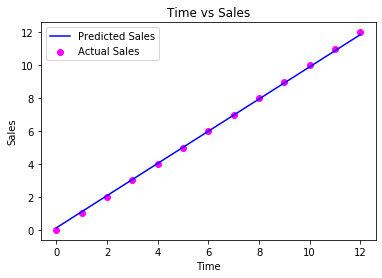

Iteration: 97


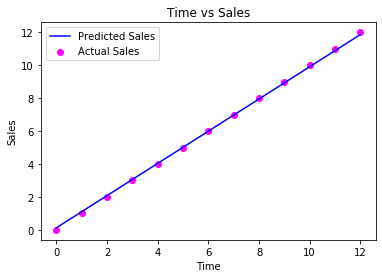

Iteration: 98


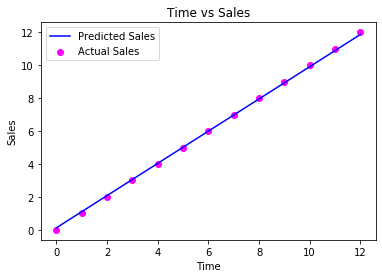

Iteration: 99


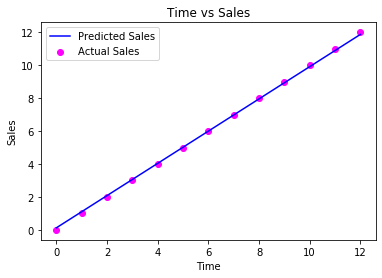

In [19]:
unitVector = np.ones((1,x.size))
X = np.insert(unitVector, 1, x.values, axis=0)
Y = np.array([y.values])
final_theta, cost_List, theta1_list = linearRegressionGradientDescent(X, Y, theta);

In [20]:
print("Predicted values for the training data set:\n")
print(final_theta.dot(X).transpose())

Predicted values for the training data set:

[[ 0.11504372]
 [ 1.09567591]
 [ 2.07630811]
 [ 3.0569403 ]
 [ 4.0375725 ]
 [ 5.01820469]
 [ 5.99883689]
 [ 6.97946908]
 [ 7.96010128]
 [ 8.94073347]
 [ 9.92136567]
 [10.90199786]
 [11.88263006]]


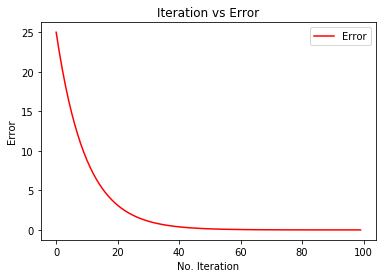

In [21]:
plt.plot(range(0, num_iterations), cost_List, color='red')
plt.title('Iteration vs Error')
plt.xlabel('No. Iteration')
plt.ylabel('Error')
plt.legend(['Error'])
plt.show()

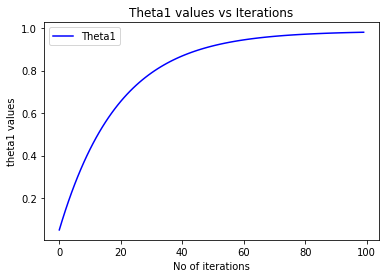

In [23]:
plt.plot(np.arange(0,100), theta1_list, color='blue')
plt.title('Theta1 values vs Iterations')
plt.xlabel('No of iterations')
plt.ylabel('theta1 values')
plt.legend(['Theta1'])
plt.show()

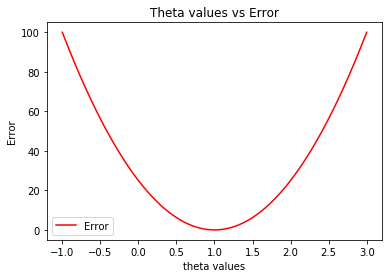

In [22]:
costList2 = []
for i in np.arange(-1, 3, 0.0002):
    new_theta = np.array([0, i])
    costList2.append(linearRegressionCostFunction(new_theta.dot(X), Y))

plt.plot(np.arange(-1, 3, 0.0002), costList2, color='red')
plt.title('Theta values vs Error')
plt.xlabel('theta values')
plt.ylabel('Error')
plt.legend(['Error'])
plt.show()

In [25]:
print("Final hyper parameter values: " + str(final_theta))

Final hyper parameter values: [[0.11504372 0.9806322 ]]


In [27]:
def predictSalesForecast(future_value):
    return final_theta.dot(np.array([[1],[future_value]]))

In [29]:
print("Sales Forecast value for a future time: " + str(predictSalesForecast(50)))

Sales Forecast value for a future time: [[49.14665348]]
